In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
%matplotlib inline

In [92]:
loansData = pd.read_csv('https://spark-public.s3.amazonaws.com/dataanalysis/loansData.csv')

#Interest features of the data to make some data analysis
features = ["Interest.Rate","FICO.Score", "Loan.Length", "Monthly.Income", "Amount.Requested"]

#Drop rows with NA entries
loansData = loansData.dropna()

#Clean of superflous strings
loansData["Interest.Rate"] = loansData["Interest.Rate"].str.replace("%","").convert_objects(convert_numeric=True)
loansData["Loan.Length"] = loansData["Loan.Length"].str.split(" ").str[0].convert_objects(convert_numeric = True)

#FICO of range to a midpoint value
minFico = loansData["FICO.Range"].str.split("-").str[0].convert_objects(convert_numeric = True)
maxFico = loansData["FICO.Range"].str.split("-").str[1].convert_objects(convert_numeric = True)
meanFico = (minFico + maxFico)/2
loansData["FICO.Range"] = meanFico

#Change the name of the column
loansData.rename(columns={"FICO.Range": "FICO.Score"}, inplace = True)

#Eliminates outliers
loansData = loansData[loansData["Monthly.Income"] < 100e3]

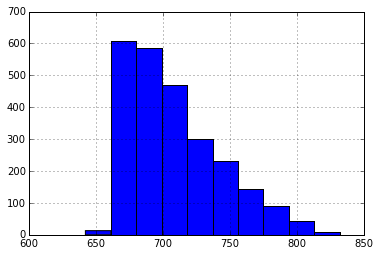

In [64]:
fico = loansData['FICO.Score']
p = fico.hist()

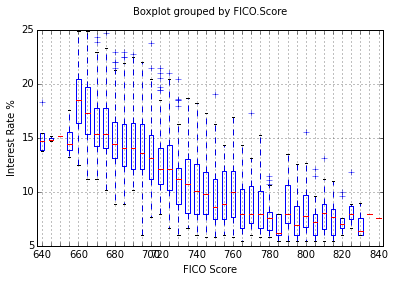

In [90]:
p = loansData.boxplot('Interest.Rate','FICO.Score')
q = p.set_xticklabels(['640','','','','660','','','','680','','','','700',
  '720','','','','740','','','','760','','','','780','','','','800','','','','820','','','','840'])

q0 = p.set_xlabel('FICO Score')
q1 = p.set_ylabel('Interest Rate %')
p.set_title('');

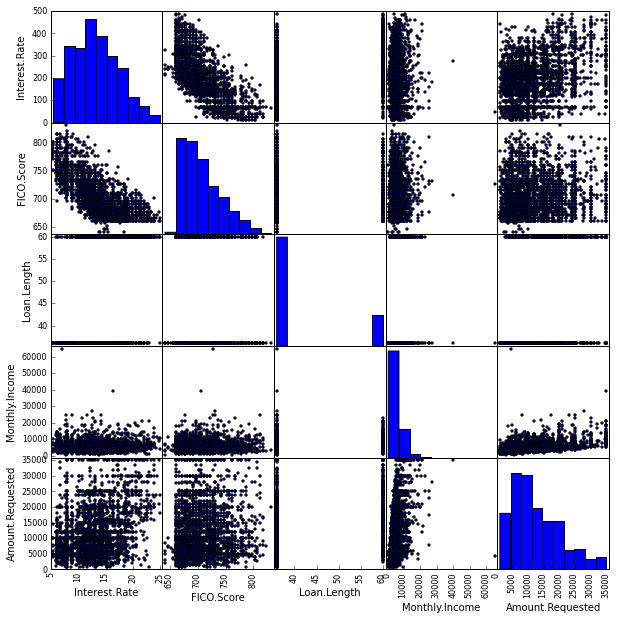

In [93]:
a = pd.scatter_matrix(loansData[features],alpha=1,figsize=(10,10), diagonal='hist')

In [94]:
data = loansData[["Amount.Requested","FICO.Score","Interest.Rate"]]

In [98]:
# reshape the data from a pandas Series to columns 
# the dependent variable
y = np.matrix(data["Interest.Rate"]).transpose()
# the independent variables shaped as columns
x1 = np.matrix(data["FICO.Score"]).transpose()
x2 = np.matrix(data["Amount.Requested"]).transpose()

# put the two columns together to create an input matrix 
# if we had n independent variables we would have n columns here
x = np.column_stack([x1,x2])

# create a linear model and fit it to the data
X = sm.add_constant(x)
model = sm.OLS(y,X)
f = model.fit()

print('Coefficients: ', f.params[0:2])
print('Intercept: ', f.params[2])
print('P-Values: ', f.pvalues)
print('R-Squared: ', f.rsquared)

Coefficients:  [ 73.14227264  -0.08856337]
Intercept:  0.000210975818162
P-Values:  [  0.00000000e+000   0.00000000e+000   8.33645885e-203]
R-Squared:  0.65670021777
